#  Fashion MNIST Classification (From Scratch with TensorFlow)

## Author: Ibrahim Hamada Mosaad  
## Project Type: Beginner Neural Network (No CNN)  
## Goal: Understand the full TensorFlow pipeline step by step


In this project, you will classify Fashion-MNIST dataset using convolutional neural networks.

##  Overview

In this project, we build a **basic neural network** to classify images of clothing
using the **Fashion MNIST** dataset.

This project focuses on **understanding the pipeline**, not achieving state-of-the-art accuracy.

You will learn:
- How datasets are loaded
- How images are preprocessed
- How a simple neural network works
- How training and evaluation happen


##  Install & Import Dependencies


In [ ]:
!pip install -U tensorflow tensorflow_datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 620.7/620.7 MB 213.9 MB/s eta 0:00:0100:01

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt
import math
import logging

# Disable unnecessary logs
tfds.disable_progress_bar()
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

print("TensorFlow version:", tf.__version__)


##  Loading the Fashion MNIST Dataset

Fashion MNIST contains **70,000 grayscale images** (28×28 pixels)
distributed across **10 clothing categories**.


In [3]:
dataset, metadata = tfds.load(
    'fashion_mnist',
    as_supervised=True,
    with_info=True
)

train_dataset, test_dataset = dataset['train'], dataset['test']


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


##  Dataset Details

- Training samples: 60,000
- Test samples: 10,000
- Image shape: 28 × 28
- Pixel values: [0, 255]
- Labels: integers from 0 to 9


##  Clothing Categories


In [4]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]


##  Visualizing Sample Images


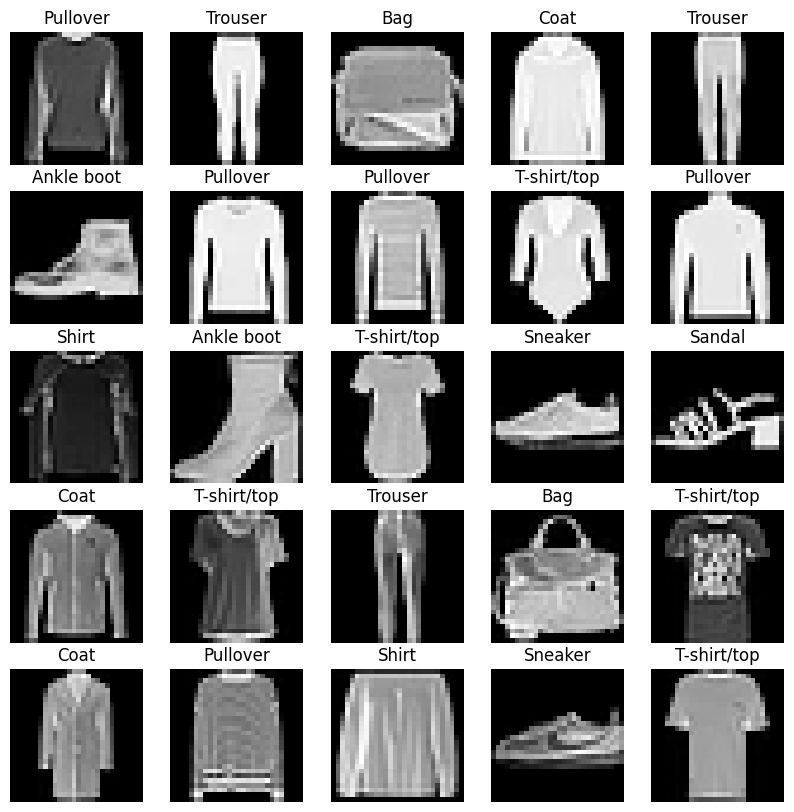

In [5]:
plt.figure(figsize=(10,10))

for i, (image, label) in enumerate(train_dataset.take(25)):
    plt.subplot(5,5,i+1)
    plt.imshow(image, cmap='gray')
    plt.title(class_names[label])
    plt.axis('off')

plt.show()


##  Data Preprocessing

Neural networks work better when inputs are normalized.
We scale pixel values from [0,255] → [0,1].


In [6]:
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(normalize)
test_dataset  = test_dataset.map(normalize)


##  Preparing Data (Batching & Shuffling)


In [7]:
BATCH_SIZE = 32

train_dataset = train_dataset.shuffle(10000).batch(BATCH_SIZE)
test_dataset  = test_dataset.batch(BATCH_SIZE)


##  Building a Simple Neural Network

 No CNN  
 No fancy tricks  
Just **Dense layers**


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

##  Compiling the Model


In [10]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


##  Training the Model


In [11]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


  52/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4614 - loss: 1.5854

I0000 00:00:1766672506.833654     137 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7785 - loss: 0.6365 - val_accuracy: 0.8468 - val_loss: 0.4356
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8626 - loss: 0.3881 - val_accuracy: 0.8674 - val_loss: 0.3728
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8761 - loss: 0.3394 - val_accuracy: 0.8633 - val_loss: 0.3864
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8850 - loss: 0.3186 - val_accuracy: 0.8716 - val_loss: 0.3591
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8909 - loss: 0.2980 - val_accuracy: 0.8724 - val_loss: 0.3478
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8950 - loss: 0.2853 - val_accuracy: 0.8781 - val_loss: 0.3496
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8991 - loss: 0.2698 - val_accuracy: 0.8784 - val_loss: 0.3451
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9069 - loss: 0.2601 - val_accurac

##  Model Evaluation

In [12]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8881 - loss: 0.3216
Test Accuracy: 0.8859000205993652


## Making Predictions

In [13]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

predictions = probability_model.predict(test_dataset)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


##  Conclusion

This project demonstrates:
- A full TensorFlow workflow
- Image classification without CNNs
- How math + data + code come together

Next step 👉 Replace Dense layers with **CNN**